# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [0]:
import pandas as pd
import datetime

def get_historical_data(symbol,start_date,end_date):
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
    url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
    url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv(url_string, header=0, names=col_names) 
    
    df = pd.DataFrame(stocks)
    return df

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [0]:
data = get_historical_data('GOOGL','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017

HTTPError: ignored

**Step 3:** Write the data to a csv file.

In [0]:
data.to_csv('google.csv',index = False)

In [0]:
df = pd.read_csv('google.csv',index=False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [0]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

**Step 2: ** Visualise raw data.

In [0]:
import matplotlib.pyplot as plt

In [0]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [0]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

**Step 4 :** Visualize the data again

In [0]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [0]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [0]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.012051,0.015141,0.377248
1,1,0.014198,0.010658,0.325644
2,2,0.009894,0.010112,0.189820
3,3,0.010874,0.007407,0.242701
4,4,0.008368,0.010298,0.224905


**Step 2:** Split data into train and test pair

In [0]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2155, 1)
y_train (2155, 1)
x_test (990, 1)
y_test (990, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [0]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [0]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

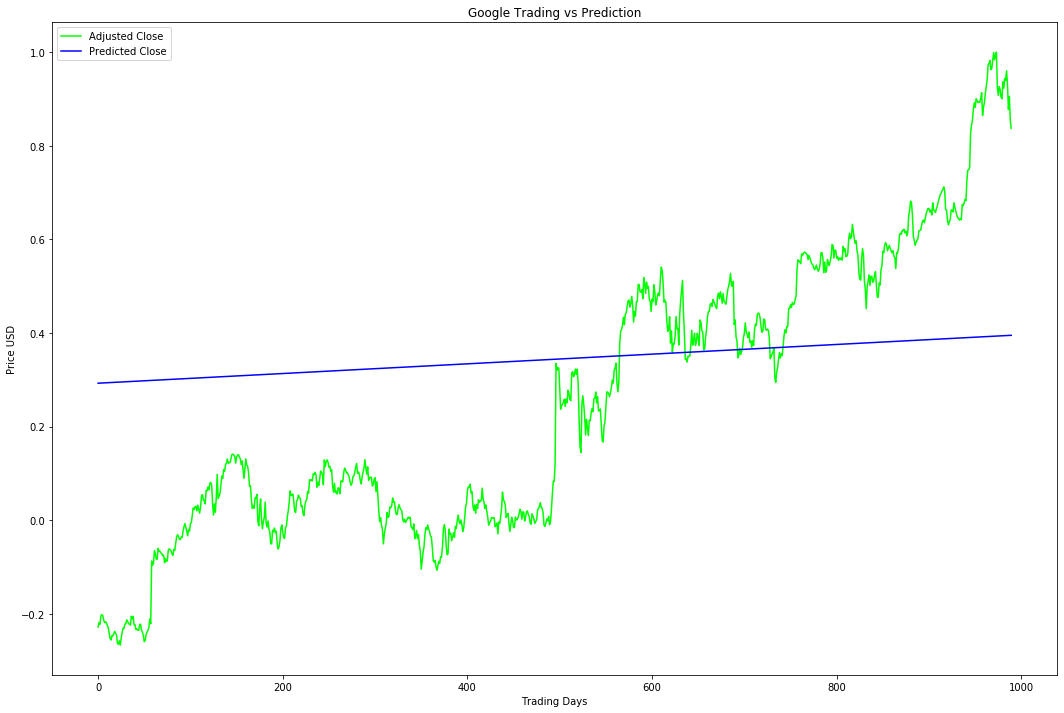

In [0]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [0]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.1852 MSE (0.4303 RMSE)
Test Score: 0.08133781 MSE (0.28519784 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [0]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

Using TensorFlow backend.


,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [0]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2589, 50, 3)
y_train (2589,)
x_test (446, 50, 3)
y_test (446,)


/content/stock_data.py:79: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_train = stocks[0:-prediction_time - test_data_cut].as_matrix()
/content/stock_data.py:80: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_train = stocks[prediction_time:-test_data_cut]['Close'].as_matrix()
/content/stock_data.py:83: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_test = stocks[0 - test_data_cut:-prediction_time].as_matrix()
/content/stock_data.py:84: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_test = stocks[prediction_time - test_data_cut:]['Close'].as_matrix()


**Step 3 :** Build a basic Long-Short Term Memory model

In [0]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)





compilation time :  0.02984309196472168


**Step 4:** Train the model

In [1]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

NameError: ignored

**Step 5:** make prediction using test data

In [0]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

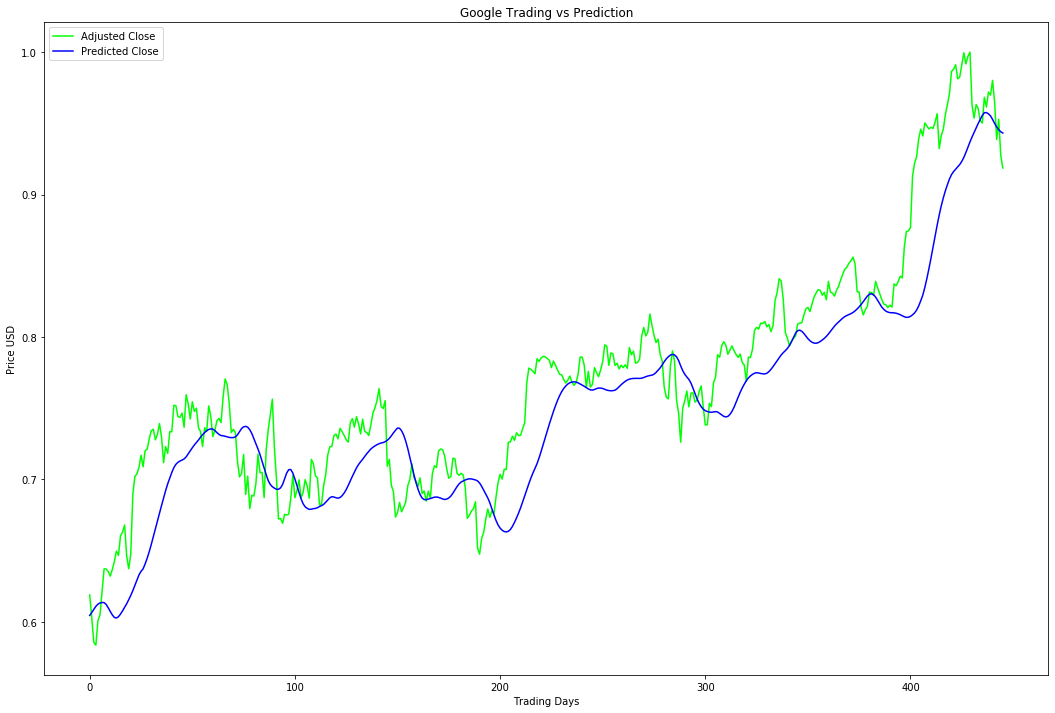

In [0]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [0]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00035211 MSE (0.01876454 RMSE)
Test Score: 0.00142124 MSE (0.03769933 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [0]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

**Step 2: ** Train improved LSTM model

In [0]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

**Step 3:** Make prediction on improved LSTM model

In [0]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

In [0]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [0]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [0]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.